In [ ]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import cv2

In [ ]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import cv2

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


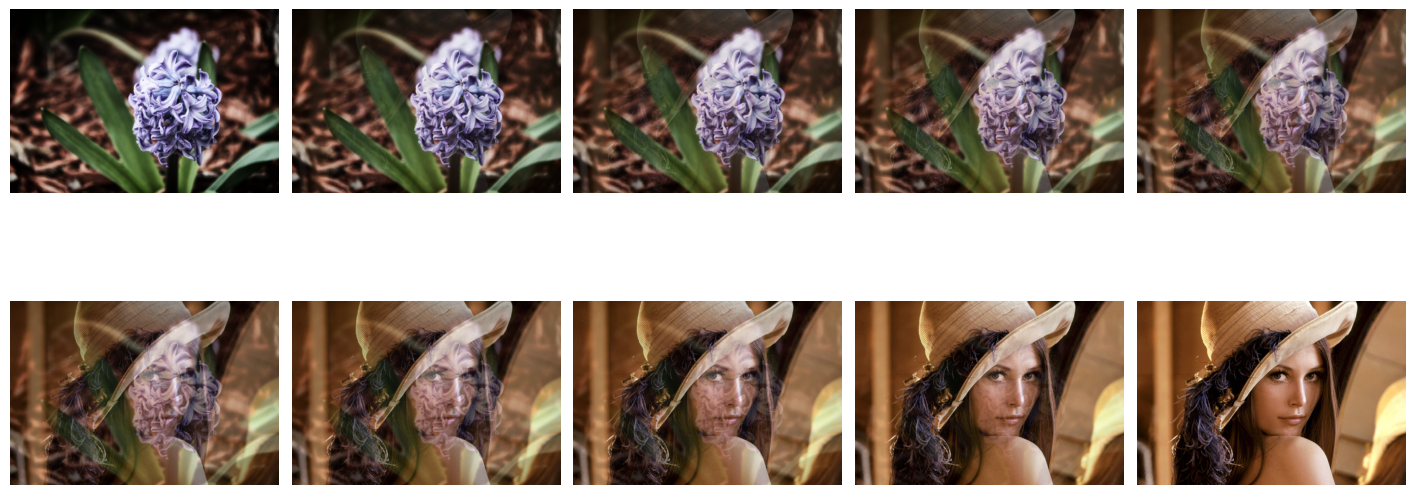

In [ ]:


im1 = mpimg.imread("/content/sample_data/lena.jpg") / 255  # scale RGB values in [0,1]
im2 = Image.open("/content/sample_data/blue_flowers.jpg")
im3 = np.array(im2.resize((1200, 822), Image.BILINEAR)) / 255

i = 1
plt.figure(figsize=(18, 15))

for alpha in np.linspace(0, 1, 10):
    print(alpha)
    plt.subplot(4, 5, i)
    o_img = (1 - alpha) * im3 + alpha * im1
    plt.imshow(o_img)
    plt.axis('off')
    i += 1

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

[[ 53  52  52 ... 144 144 144]
 [ 56  54  53 ... 144 144 144]
 [ 58  56  54 ... 144 144 144]
 ...
 [ 41  39  37 ...  31  32  32]
 [ 36  35  33 ...  31  31  31]
 [ 33  31  29 ...  31  30  30]]


<ipython-input-12-e8eb466c3f74>:20: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = np.log(np.abs(fft_signal))
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


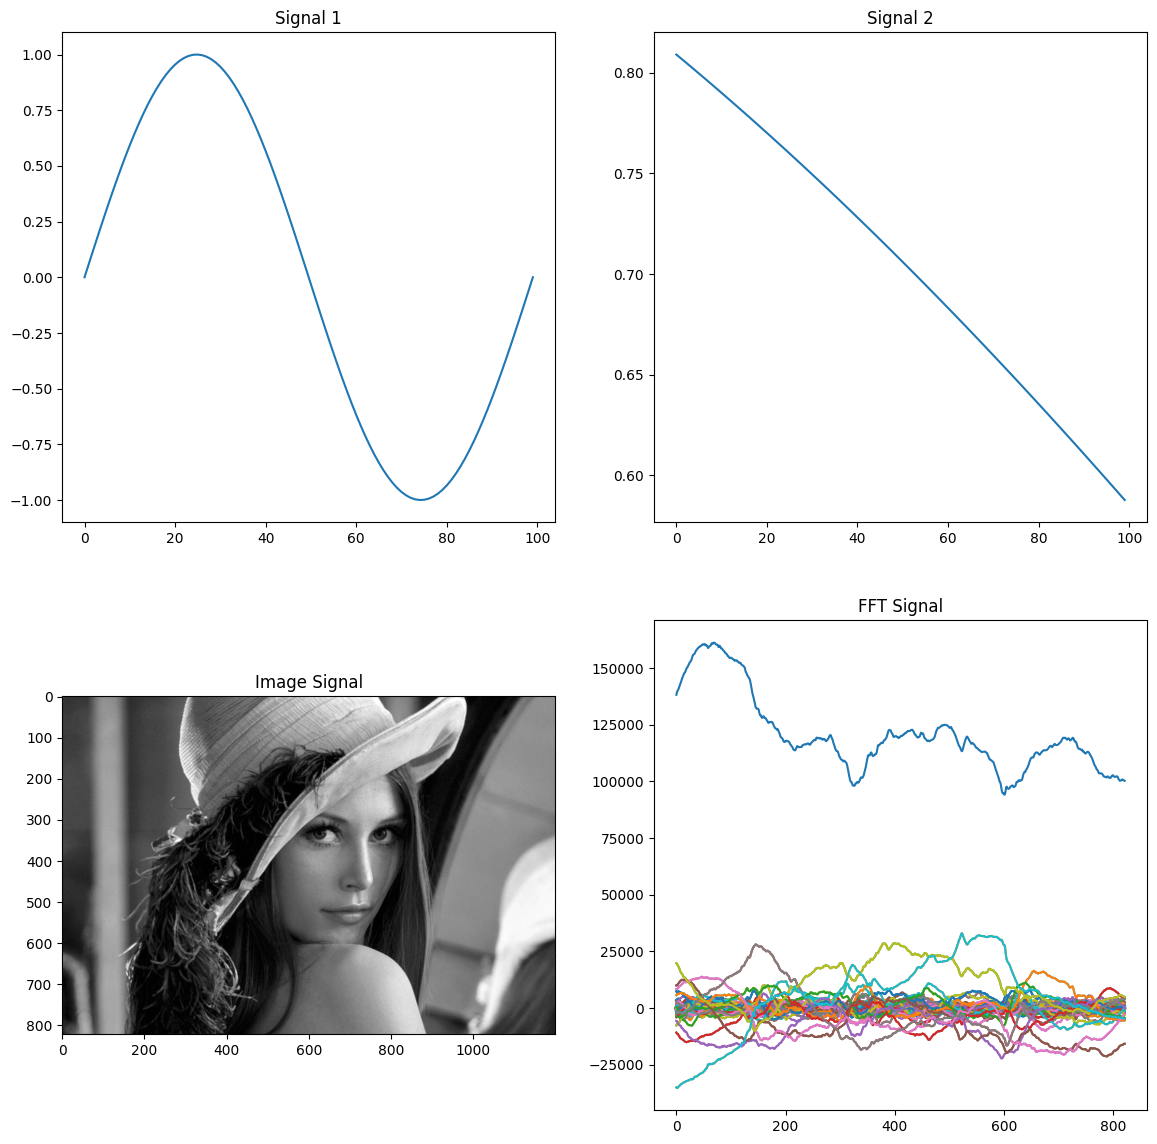

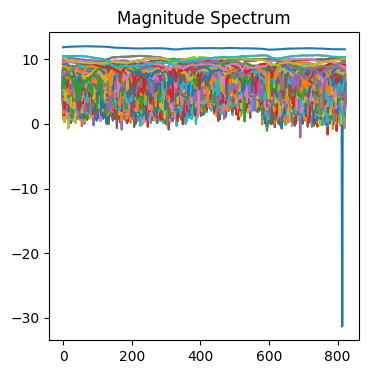

In [ ]:
import numpy as np
from scipy.fftpack import fft
from PIL import Image
import matplotlib.pyplot as plt

# Create signals
signal1 = np.sin(2 * np.pi * 100 * np.linspace(0, 1, 100))
signal2 = np.cos(np.pi * 0.100 * np.linspace(2, 3, 100))

# Load and convert image
im = Image.open("/content/sample_data/lena.jpg")
im_l = im.convert('L')
signal = np.array(im_l)
print(signal)

# Compute the FFT
fft_signal = fft(signal)

# Compute the magnitude spectrum
magnitude_spectrum = np.log(np.abs(fft_signal))

# Compute the phase of the Fourier transform
phase = np.angle(fft_signal)

# Plot the signals
plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.plot(signal1)
plt.title('Signal 1')

plt.subplot(2, 2, 2)
plt.plot(signal2)
plt.title('Signal 2')

plt.subplot(2, 2, 3)
plt.imshow(signal, cmap='gray')
plt.title('Image Signal')

# Plot the FFT
plt.subplot(2, 2, 4)
plt.plot(fft_signal)
plt.title('FFT Signal')

plt.figure(figsize=(4, 4))
plt.plot(magnitude_spectrum)
plt.title('Magnitude Spectrum')

plt.show()

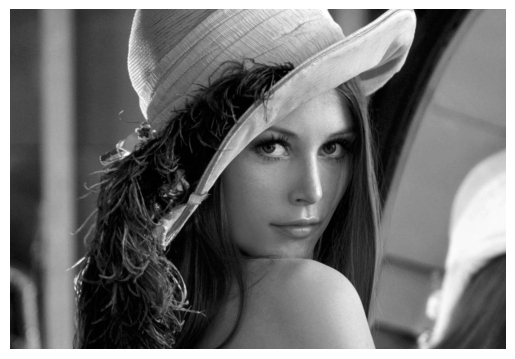

In [ ]:
import numpy as np
from scipy.fftpack import fft
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
# im = Image.open("lena.jpg")
im = Image.open("/content/sample_data/lena.jpg")

# Convert the image to grayscale
im_l = im.convert('L')

# Convert the grayscale image to a NumPy array
img = np.array(im_l)

# Display the grayscale image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

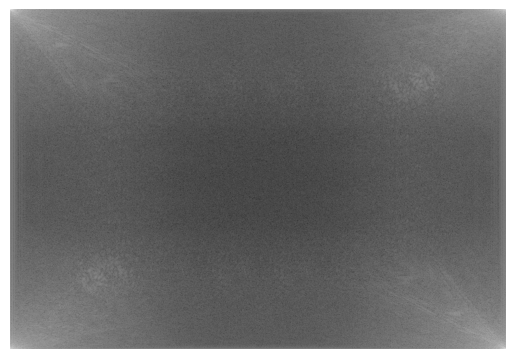

In [ ]:
# Taking Fourier Transform of the image in frequency domain
F_img = np.fft.fft2(img)

# Display the Fourier Transform of the image
plt.imshow(np.log1p(np.abs(F_img)), cmap='gray')  # complex matrix, so absolute values
plt.axis('off')
plt.show()

# Note: The output is not center-shifted. The (0, 0) has the bright DC component.

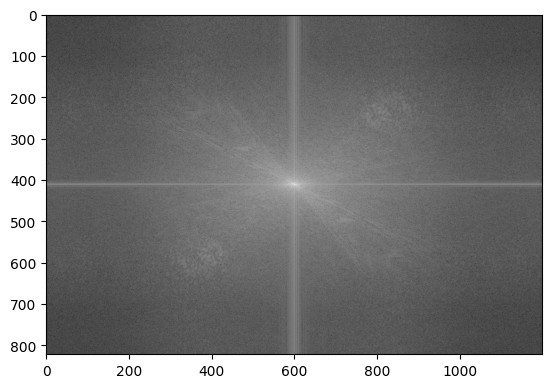

In [ ]:
# Note: np.log1p(x) : calculate natural logarithmic value of x+1.
Fshift = np.fft.fftshift(F_img)
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
# note: transformation funtion is applied after shift of the absolute values and not plt.axis('off')
plt.show()

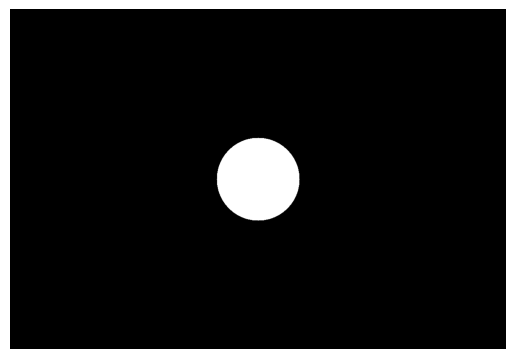

725.8794665783018


In [ ]:
# Creating a Filter: Low pass filter
# Note: We are creating an ideal low pass filter

M, N = img.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 100

for u in range(M):
    for v in range(N):
        D = np.sqrt(((u - M / 2) ** 2) + ((v - N / 2) ** 2))  # computing Euclidean distance from the center
        if D <= D0:
            H[u, v] = 1
        else:
            H[u, v] = 0

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()
print(D)

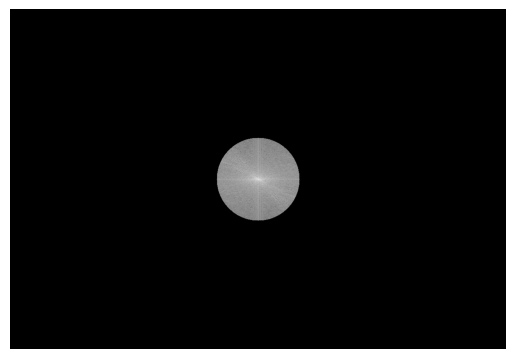

[[-0.+0.j -0.+0.j  0.+0.j ... -0.+0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.-0.j -0.+0.j ...  0.+0.j  0.-0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.-0.j ... -0.+0.j  0.+0.j  0.-0.j]
 ...
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.-0.j -0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j ... -0.+0.j -0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.+0.j  0.-0.j -0.+0.j]]


In [ ]:
# Ideal Low Pass Filtering is applied on the image to remove the high frequencies
G_out = Fshift * H

plt.imshow(np.log1p(np.abs(G_out)), cmap='gray')
plt.axis('off')
plt.show()
print(G_out)

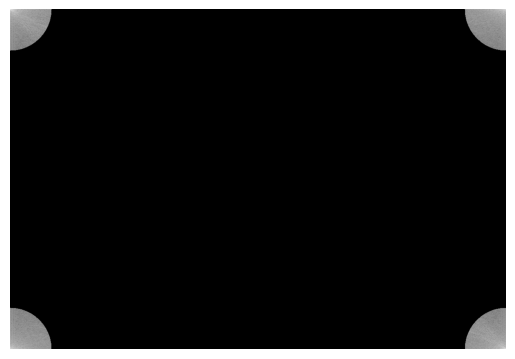

[[ 99283519.        +0.00000000e+00j   4068341.46221755+1.58788046e+07j
    8546286.97572719-4.82461618e+06j ...
    -193150.50357726-7.91457275e+06j   8546286.97572719+4.82461618e+06j
    4068341.46221755-1.58788046e+07j]
 [  3717227.06435176-4.00698180e+06j -11386093.878692  +6.72872668e+06j
   -7930133.14928328-3.51713520e+06j ...
    1900916.31626016+1.74308970e+06j  -1530553.97788432+4.63452229e+06j
   -2620081.68919544+1.75063537e+06j]
 [  2318493.7049448 -5.47735619e+06j  -4444502.78369102+1.62086965e+06j
    4456255.44236314+1.75898071e+05j ...
   -1436881.9976882 +2.23153093e+06j   -518663.63252278-3.86500689e+04j
   -1671596.24182104-1.31620779e+06j]
 ...
 [ -1630443.1261522 +1.61647298e+06j   1518812.27217398-2.92051437e+06j
    1271988.55874028+6.26702838e+05j ...
   -3235948.62168114-2.91628183e+06j   1375322.48478149-1.34256864e+03j
    -271692.4586107 -7.43802427e+05j]
 [  2318493.7049448 +5.47735619e+06j  -1671596.24182104+1.31620779e+06j
    -518663.63252278+3.86500689

In [ ]:
# Inverse Fourier Transform is taken to shift the coordinate system and the frequencies
G = np.fft.ifftshift(G_out)

# plt.imshow((np.abs(G)), cmap='gray') # Will display black as not transformed
plt.imshow(np.log1p(np.abs(G)), cmap='gray') # Note: transformed display and frequency
plt.axis('off')
plt.show()
print(G)

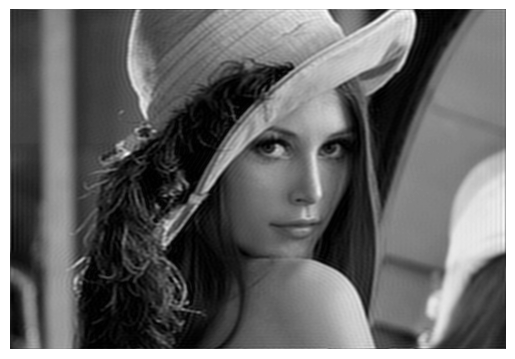

In [ ]:
# To get the output as an image, the complex component has to be removed by taking the magnitude
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

[[214 214 214 ... 217 217 217]
 [214 214 214 ... 217 217 217]
 [214 214 214 ... 217 217 217]
 ...
 [214 215 216 ... 217 217 217]
 [214 215 216 ... 217 217 217]
 [214 215 216 ... 217 217 217]]


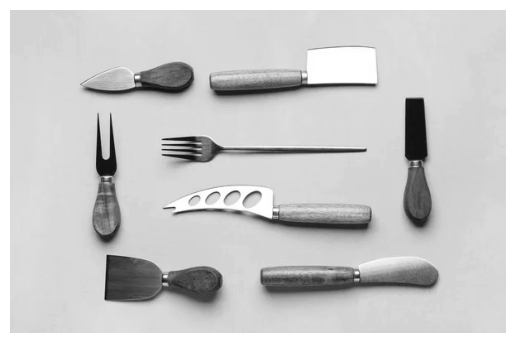

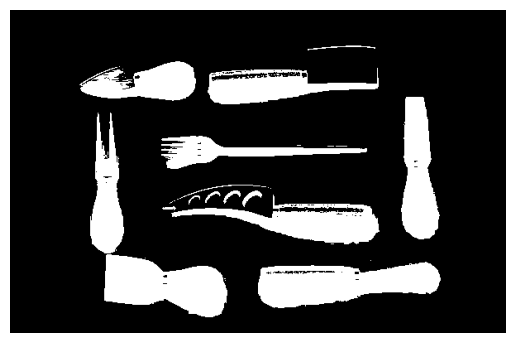

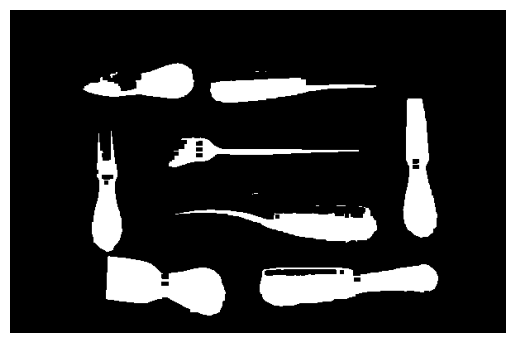

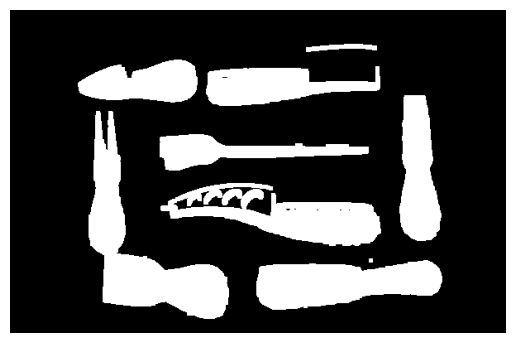

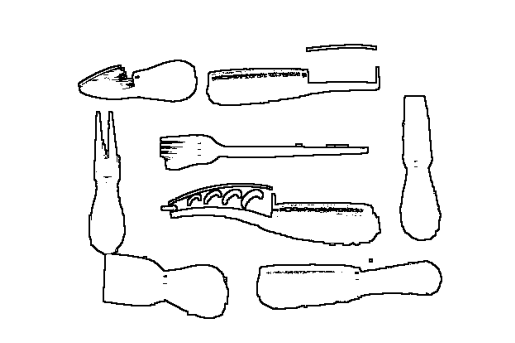

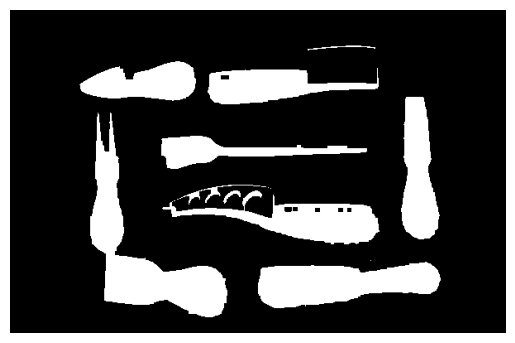

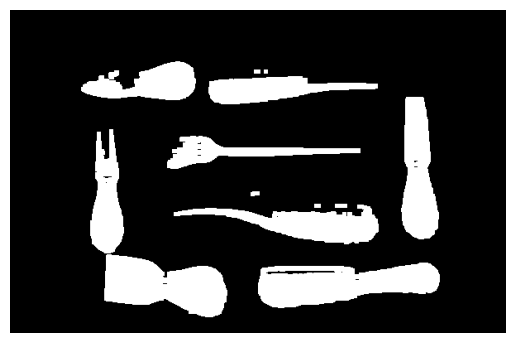

In [ ]:
image = Image.open("/content/sample_data/uti.jpg")

# Convert the image to grayscale
image = image.convert("L")

plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')

# Binarize the image
threshold = 200
img = image.point(lambda p: p > threshold and 255)
print(np.array(image))


plt.figure()
plt.imshow(img, cmap='binary')
plt.axis('off')

template = np.ones((5,5), np.uint8)

# Dilation of the Image
dilation = cv2.dilate(np.array(img), template, iterations=1)


plt.figure()
plt.imshow(dilation, cmap='binary')
plt.axis('off')

# Erosion of the Image
erosion = cv2.erode(np.array(img), template, iterations=1)

plt.figure()
plt.imshow(erosion, cmap='binary')
plt.axis('off')

# Boundary Extraction
dif = np.array(img) - erosion


plt.figure()
plt.imshow(dif, cmap='binary')
plt.axis('off')


# Opening of the Image
opening = cv2.morphologyEx(np.array(img), cv2.MORPH_OPEN, template)


plt.figure()
plt.imshow(opening, cmap='binary')
plt.axis('off')


# Closing of the Image
closing = cv2.morphologyEx(np.array(img), cv2.MORPH_CLOSE, template)




plt.figure()
plt.imshow(closing, cmap='binary')
plt.axis('off')

plt.show()

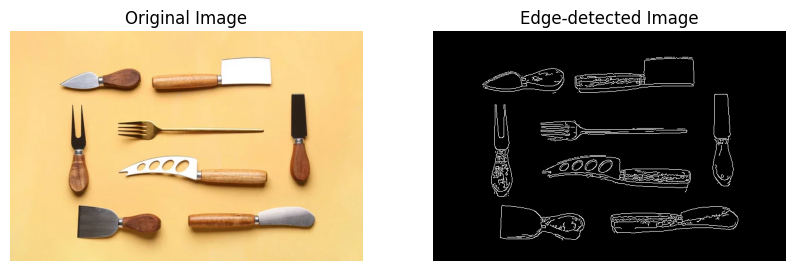

In [ ]:
from PIL import Image           # Importing Image module from Pillow library
import cv2                      # Importing cv2 module for OpenCV functions
import numpy as np              # Importing numpy for array manipulation
import matplotlib.pyplot as plt # Importing matplotlib for visualization

# Open the image using Pillow
img = Image.open("/content/sample_data/uti.jpg")

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the image to a numpy array
img_np = np.array(img_gray)

# Apply Canny edge detection using OpenCV
edges = cv2.Canny(img_np, 60, 150)

# Display the images side by side using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge-detected Image')
plt.axis('off')

plt.show()


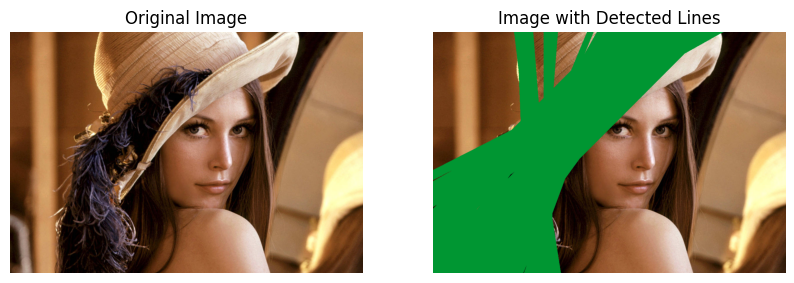

In [ ]:
import cv2              # Importing OpenCV library
import numpy as np      # Importing NumPy library
from PIL import Image  # Importing Image module from PIL library
import matplotlib.pyplot as plt  # Importing Matplotlib library

# Open the image using Pillow
img = Image.open("/content/sample_data/lena.jpg")

# Convert the image to grayscale
img_gray = img.convert('L')

# Convert the grayscale image to a numpy array
img_np = np.array(img_gray)

# Apply Canny edge detection using OpenCV
edges = cv2.Canny(img_np, 50, 150)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/80, 200)

# Convert the original image to RGB format
img_rgb = np.array(img.convert('RGB'))  # Convert the image to a NumPy array

# Draw the detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_rgb, (x1, y1), (x2, y2), (0, 150, 50), 20)

# Display the original image with detected lines using Matplotlib
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title('Image with Detected Lines')
plt.axis('off')

# Show the plot
plt.show()


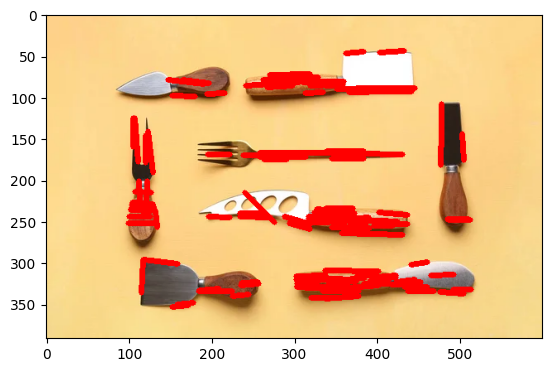

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in the image
image = cv2.imread('/content/sample_data/uti.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define parameters for Canny edge detection
low_threshold = 50
high_threshold = 100

# Apply Canny edge detection
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

# Define Hough transform parameters
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 20
max_line_gap = 5

# Create a blank image to draw lines on
line_image = np.copy(image)

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# Display the image with detected lines
plt.imshow(line_image)
x

In [ ]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

In [ ]:
def blur(img, mode='gaussian', kernel_size=3):
    # Create a copy of the input image
    dummy = np.copy(img)

    # Define the blurring kernel based on the specified mode
    if mode == 'box':
        # Create a box filter kernel with equal weights
        h = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    elif mode == 'gaussian':
        # Create a Gaussian filter kernel
        h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        # Create a motion blur kernel
        h = np.eye(kernel_size) / kernel_size

    # Apply the convolution operation with the defined kernel
    dummy = convolve2d(dummy, h)

    return dummy

In [ ]:
def add_gaussian_noise(img, sigma):
    # Generate Gaussian noise with mean 0 and standard deviation sigma
    gauss = np.random.normal(0, sigma, np.shape(img))

    # Add the generated noise to the input image
    noisy_img = img + gauss

    # Clip the pixel values to ensure they are within the valid range [0, 255]
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255

    return noisy_img

In [ ]:
def wiener_filter(img, kernel, K):
    # Normalize the kernel
    kernel /= np.sum(kernel)

    # Create a copy of the input image
    dummy = np.copy(img)

    # Apply Fast Fourier Transform (FFT) to the image and the kernel
    dummy = fft2(dummy)
    kernel = fft2(kernel, s=img.shape)

    # Compute the Wiener filter using the Fourier transform of the kernel
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)

    # Apply the Wiener filter to the FFT of the image
    dummy = dummy * kernel

    # Apply inverse FFT to obtain the filtered image in spatial domain
    dummy = np.abs(ifft2(dummy))

    return dummy

In [ ]:
def gaussian_kernel(kernel_size=3):
    """
    Generates a 2D Gaussian kernel.

    Args:
    - kernel_size: Size of the kernel (default is 3).

    Returns:
    - h: 2D Gaussian kernel.
    """
    # Generate a 1D Gaussian kernel
    kernel_1d = gaussian(kernel_size, kernel_size / 3)

    # Reshape the 1D kernel into a 2D kernel
    h = np.outer(kernel_1d, kernel_1d)

    # Normalize the kernel
    h /= np.sum(h)

    return h

def rgb2gray(rgb):
    """
    Converts an RGB image to grayscale using the luminosity method.

    Args:
    - rgb: RGB image represented as a numpy array with shape (height, width, 3).

    Returns:
    - grayscale_img: Grayscale image represented as a numpy array with shape (height, width).
    """
    # Compute weighted sum of RGB channels to get grayscale image
    grayscale_img = np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

    return grayscale_img

In [ ]:
# Load the image in grayscale
file_name = os.path.join('/content/sample_data/lena.jpg')
img = rgb2gray(plt.imread(file_name))

# Blur the grayscale image using motion blur
blurred_img = blur(img, mode='motion', kernel_size=30)

# Add Gaussian noise to the blurred image
noisy_img = add_gaussian_noise(blurred_img, sigma=2)

# Generate a Gaussian kernel for Wiener filtering
kernel = gaussian_kernel(3)

# Apply Wiener filter to denoise the noisy image
filtered_img = wiener_filter(noisy_img, kernel, K=20)

<ipython-input-47-86b1a25cbab3>:12: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  kernel_1d = gaussian(kernel_size, kernel_size / 3)


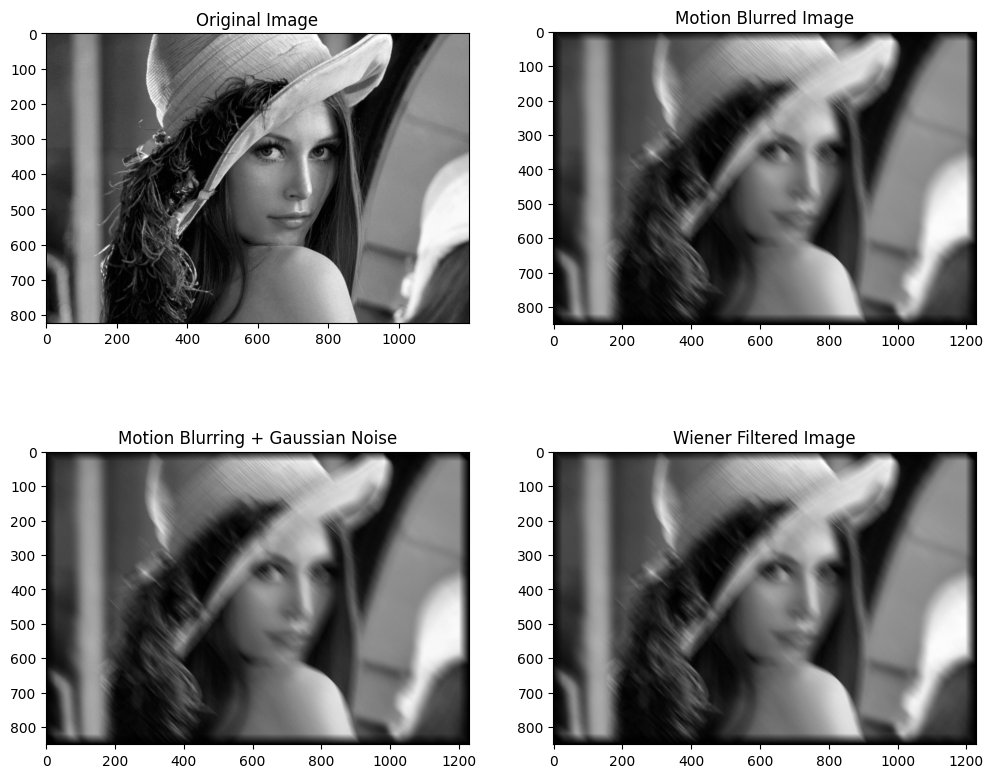

In [ ]:
display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filtered Image']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap='gray')
    plt.title(label[i])

plt.show()


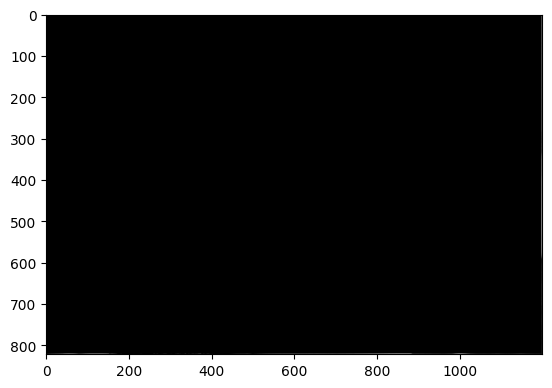

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Load the image
image = Image.open('/content/sample_data/lena.jpg')

# Convert the image to grayscale
gray_image = image.convert('L')

# Apply the Laplacian filter
edge_image = gray_image.filter(ImageFilter.Kernel((3, 3), [0, -1, 0, -1, 4, -1, 0, -1, 0]))

# Convert the filtered image back to RGB
edge_image_rgb = edge_image.convert('RGB')

# Display the edge-detected image
plt.imshow(edge_image, cmap=plt.get_cmap('Greys_r'))
plt.show()


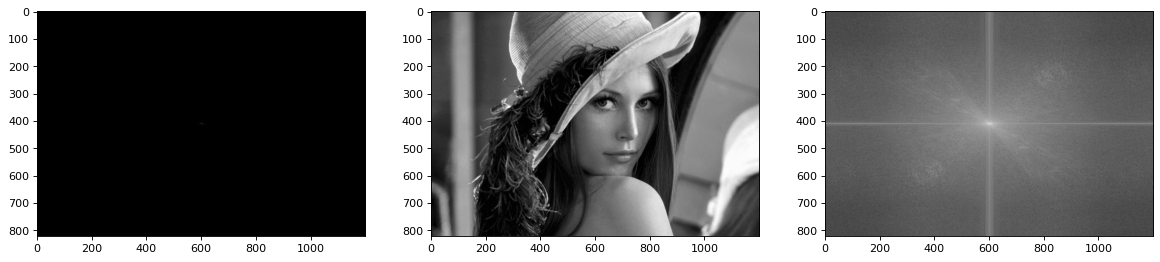

In [2]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform

img = rgb2gray(plt.imread('/content/sample_data/lena.jpg'))

# Take the 2D Fourier Transform of the grayscale image
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(img))

# Display the results
plt.figure(num=None, figsize=(18, 16), dpi=80)

# Plot the magnitude of the Fourier Transform
plt.subplot(1, 3, 1)
plt.imshow((abs(dark_image_grey_fourier)), cmap='gray')

# Plot the original grayscale image
plt.subplot(1, 3, 2)
plt.imshow(((img)), cmap='gray')

# Plot the logarithm of the magnitude of the Fourier Transform
plt.subplot(1, 3, 3)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

[[4.33752028e-05 4.34048387e-05 4.34226300e-05 4.34285621e-05
  4.34226300e-05 4.34048387e-05 4.33752028e-05]
 [4.34048387e-05 4.34344950e-05 4.34522984e-05 4.34582345e-05
  4.34522984e-05 4.34344950e-05 4.34048387e-05]
 [4.34226300e-05 4.34522984e-05 4.34701092e-05 4.34760477e-05
  4.34701092e-05 4.34522984e-05 4.34226300e-05]
 [4.34285621e-05 4.34582345e-05 4.34760477e-05 4.34819870e-05
  4.34760477e-05 4.34582345e-05 4.34285621e-05]
 [4.34226300e-05 4.34522984e-05 4.34701092e-05 4.34760477e-05
  4.34701092e-05 4.34522984e-05 4.34226300e-05]
 [4.34048387e-05 4.34344950e-05 4.34522984e-05 4.34582345e-05
  4.34522984e-05 4.34344950e-05 4.34048387e-05]
 [4.33752028e-05 4.34048387e-05 4.34226300e-05 4.34285621e-05
  4.34226300e-05 4.34048387e-05 4.33752028e-05]]


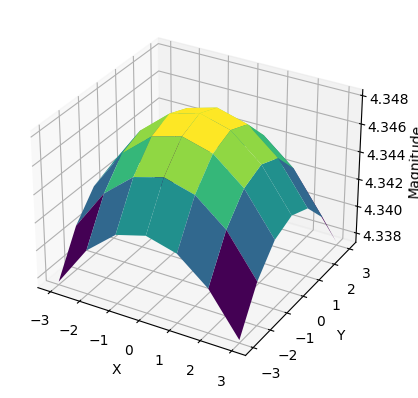

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigma value
sigma = 60.5

# Create an empty kernel matrix
kernel = np.zeros((7, 7))

# Specify the x and y values
x_values = [-3, -2, -1, 0, 1, 2, 3]
y_values = [3, 2, 1, 0, -1, -2, -3]
p, q = np.meshgrid(x_values, y_values)

# Normalize the kernel (Not needed before values are computed)
# kernel = kernel / np.sum(kernel)

# Calculate the kernel values
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        kernel[i, j] = (1/(2*np.pi*sigma**2)) * np.exp(-((x)**2 + (y)**2)/(2*sigma**2))

print(kernel)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p, q, kernel, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Magnitude')

plt.show()


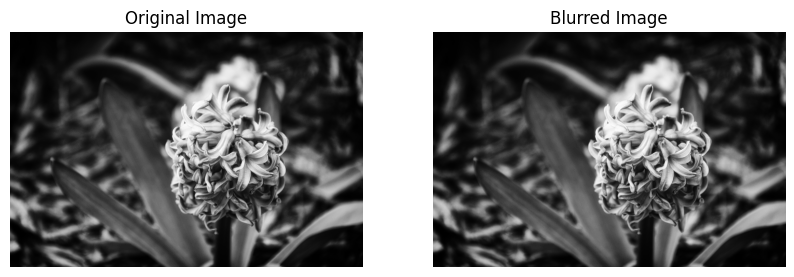

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from scipy.ndimage import convolve
import cv2

# Assuming you've defined the kernel previously
kernel = np.array([[0, 0, 0, 0, 0],
                   [0, 1, 2, 1, 0],
                   [0, 2, 4, 2, 0],
                   [0, 1, 2, 1, 0],
                   [0, 0, 0, 0, 0]])

image = rgb2gray(plt.imread('/content/sample_data/blue_flowers.jpg'))

# Apply the convolution
blurred_image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

# Display the original and blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


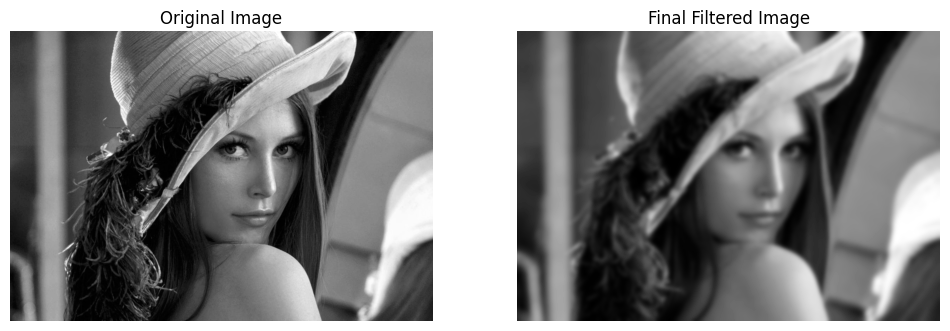

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d

def gaussian_kernel(sigma, size):
    x = np.arange(-size//2, size//2 + 1)
    kernel = np.exp(-x**2 / (2 * sigma**2))
    return kernel / np.sum(kernel)

def separable_gaussian_filter(image, sigma):
    size = int(sigma * 6) + 1
    kernel = gaussian_kernel(sigma, size)
    # Apply horizontal and vertical 1D convolutions
    filtered_image = convolve1d(convolve1d(image, kernel, axis=0), kernel, axis=1)
    return filtered_image

# Example usage
image = rgb2gray(plt.imread('/content/sample_data/lena.jpg'))
sigma = 5.5
filtered_image = separable_gaussian_filter(image, sigma)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Final Filtered Image')
plt.axis('off')

plt.show()


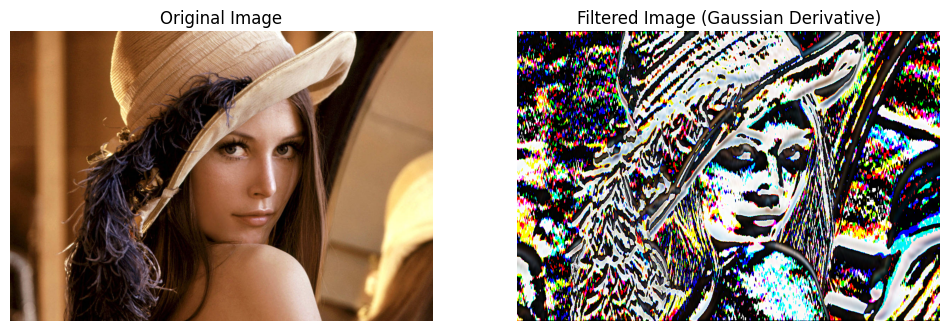

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
from PIL import Image

def gaussian_derivative_kernel(sigma, size, order):
    x = np.arange(-size//2, size//2 + 1)
    kernel = -x * np.exp(-x**2 / (2 * sigma**2))
    if order == 1:
        return kernel / (sigma**2)
    elif order == 2:
        return (x**2 - sigma**2) * np.exp(-x**2 / (2 * sigma**2)) / (sigma**4)
    else:
        raise ValueError("Order should be 1 or 2")

def apply_gaussian_derivative(image, sigma, order):
    size = int(sigma * 6) + 1
    kernel = gaussian_derivative_kernel(sigma, size, order)
    # Apply 1D convolution
    filtered_image = convolve1d(image, kernel, axis=0)
    return filtered_image

# Example usage
image = Image.open("/content/sample_data/lena.jpg")
image = np.array(image)
sigma = 5.5
order = 1
filtered_image = apply_gaussian_derivative(image, sigma, order)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Gaussian Derivative)')
plt.axis('off')

plt.show()


10000
float64
uint8


<ipython-input-14-8977a2d9e209>:43: RuntimeWarning: invalid value encountered in cast
  uint8_array = (int_im).astype(np.uint8)


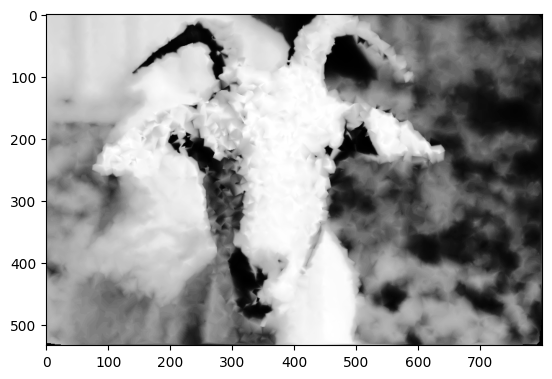

In [14]:
import os
import sys
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from PIL import Image


def make_interpolated_image(nsamples):
  ix = np.random.randint(im.shape[1], size=nsamples)
  iy = np.random.randint(im.shape[0], size=nsamples)
  samples = im[iy,ix]
  int_im = griddata((iy, ix), samples, (Y, X))
  return int_im



img_name = "/content/sample_data/goat.jpg" # rows = 534    columns = 800
im = Image.open(img_name)
im = np.array(im.convert('L'))


nx, ny = im.shape[1], im.shape[0]  #   nx = columns   and ny = rows
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
# print (X,Y)


i = 2
nrows, ncols = 2, 2
nsamples = 10**(i+2)
print(nsamples)

ix = np.random.randint(im.shape[1], size=nsamples)  # 800 --col
iy = np.random.randint(im.shape[0], size=nsamples)  # 534 --row
samples = im[iy,ix]
int_im = griddata((iy, ix), samples, (Y, X))

plt.imshow(int_im, cmap=plt.get_cmap('Greys_r'))
print(int_im.dtype)

samples = im[iy, ix]
int_im = griddata((iy, ix), samples, (Y, X))
uint8_array = (int_im).astype(np.uint8)
equ = cv2.equalizeHist(uint8_array)

print(uint8_array.dtype)
plt.imshow(equ, cmap=plt.get_cmap('Greys_r'))


<ipython-input-15-0424e7de74fe>:7: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference, multichannel=False)


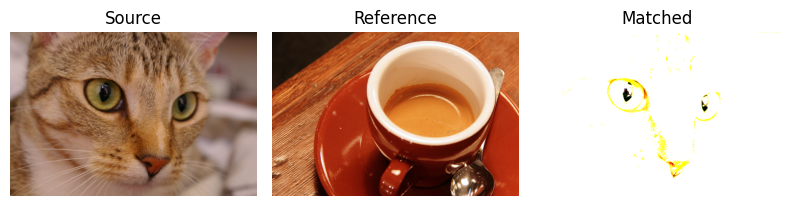

In [15]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()
matched = match_histograms(image, reference, multichannel=False)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

for ax in (ax1, ax2, ax3):
    ax.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')

ax2.imshow(reference)
ax2.set_title('Reference')

ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()


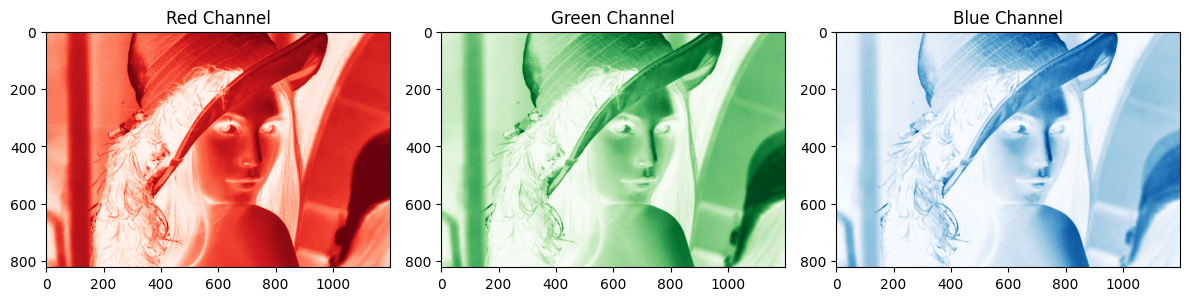

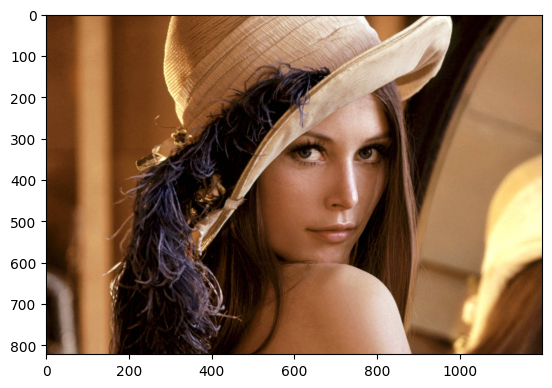

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an example RGB image using PIL
image = Image.open("/content/sample_data/lena.jpg")

# Split the image into its separate channels
red_channel, green_channel, blue_channel = image.split()

# Plot each channel separately
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.imshow(red_channel, cmap='Reds')
ax1.set_title('Red Channel')

ax2.imshow(green_channel, cmap='Greens')
ax2.set_title('Green Channel')

ax3.imshow(blue_channel, cmap='Blues')
ax3.set_title('Blue Channel')

plt.tight_layout()
plt.show()

channels = (red_channel, green_channel, blue_channel)
rgb_image = Image.merge("RGB", channels)

plt.imshow(rgb_image)
plt.show()


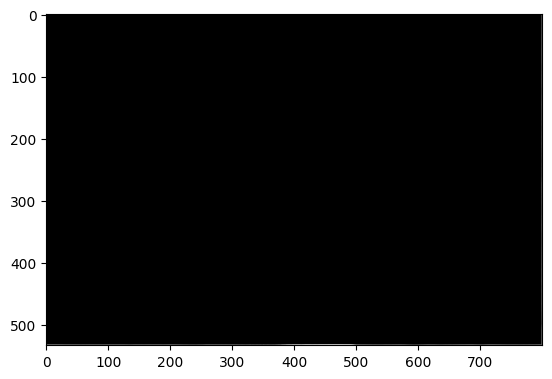

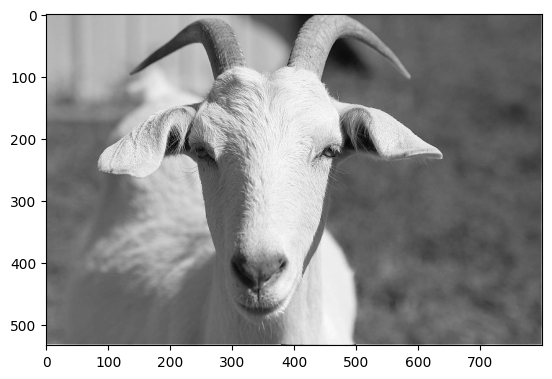

In [18]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('/content/sample_data/goat.jpg')

# Convert the image to grayscale
gray_image = image.convert('L')

# Apply the Laplacian filter
edge_image = gray_image.filter(ImageFilter.Kernel((3, 3), [0, -1, 0, -1, 4, -1, 0, -1, 0]))

# Convert the filtered image back to RGB
edge_image_rgb = edge_image.convert('RGB')

# Save or display the edge-detected image
plt.imshow(edge_image, cmap=plt.get_cmap('Greys_r'))
plt.show()

# You may want to perform additional operations on edge_image before combining it with gray_image
# For example, you could normalize the edge_image or adjust its contrast before adding it to gray_image

# Convert gray_image to a numpy array
gray_array = np.array(gray_image)

# Convert edge_image to a numpy array
edge_array = np.array(edge_image)

# Combine the two images by adding them together
image_out = gray_array + edge_array

# Display the combined image
plt.imshow(image_out, cmap='gray')
plt.show()
